In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f = 20;#20hz natural frequency
sp = 0.001;#sampling period
x = np.array([x for x in np.arange(0,1,sp)]);
p = np.pi;
y = np.sin(2*(p*f)*x);
x = x.reshape([x.shape[0],1])
y = y.reshape([y.shape[0],1])

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

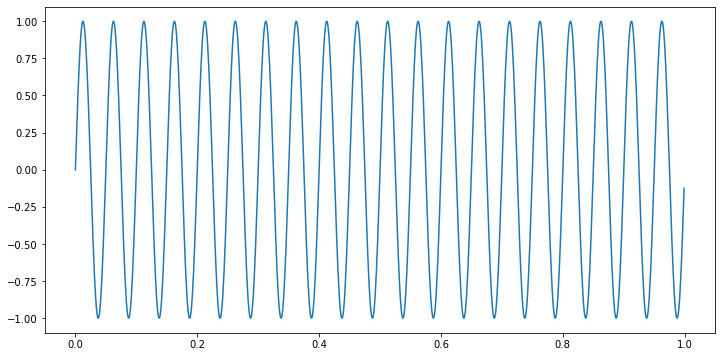

In [3]:
plt.figure(figsize=(12,6))
plt.plot(x,y)
plt.grid

In [4]:
X = x[0:int(len(x)/2)];
Y = y[0:int(len(y)/2)];

In [5]:
X.shape

(500, 1)

Epoch= 0
Epoch= 1
Epoch= 2
Epoch= 3
Epoch= 4
Epoch= 5
Epoch= 6
Epoch= 7
Epoch= 8


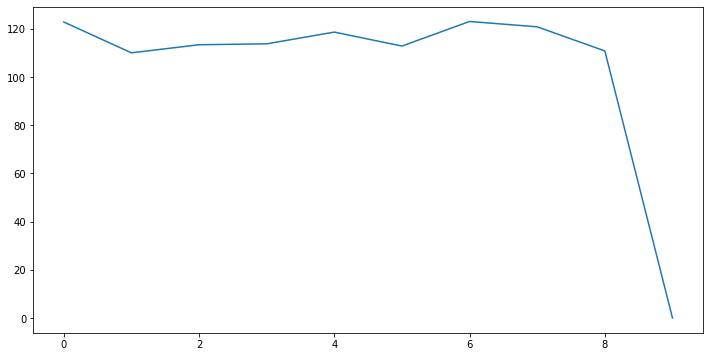

In [6]:
#from rec import RNN
exec(open('rnn.py').read())
rnn = RNN()
#X = x[0:int(len(x)/2)];
#Y = y[0:int(len(y)/2)];
#X = X.reshape([X.shape[0],1])
#Y = Y.reshape([Y.shape[0],1])
hid_neurons = 100; seq_length = 5; epochs=10; lr=10**(-7);
Wfx,Wxx,Wxa,J = rnn.fit(x,y,hid_neurons,seq_length,epochs,lr)

[[0.]]
[[-0.01603809]]
[[-0.08140918]]
[[-0.10329411]]
[[-12.11545814]]
[[-7.95740714]]
[[-8.69080994]]
[[8.13477157]]
[[-6.38535983]]
[[-1.98908654]]
[[-9.79386522]]
[[-2.83525229]]
[[1.15447246]]
[[16.15593108]]
[[-19.98333324]]
[[-0.26661622]]
[[8.97018781]]
[[-9.80178446]]
[[-3.99558594]]
[[11.16795367]]
[[7.60645488]]
[[1.17734125]]
[[10.28357565]]
[[5.43358504]]
[[-5.87033926]]
[[-6.44688045]]
[[-4.16149102]]
[[-15.30015119]]
[[-4.55541051]]
[[17.07799617]]
[[-1.93970945]]
[[-8.52450984]]
[[-5.11160882]]
[[-27.67226569]]
[[-12.06227041]]
[[-10.64410267]]
[[-11.98052569]]
[[-16.44485843]]
[[-9.26183765]]
[[-4.65417235]]
[[1.24976955]]
[[-6.25411787]]
[[1.73148325]]
[[7.65683182]]
[[-17.31985734]]
[[-34.25867654]]
[[-10.55409217]]
[[-3.09872065]]
[[-7.51237594]]
[[11.32123522]]
[[-6.78916745]]
[[9.90623562]]
[[-7.1826392]]
[[-15.86073095]]
[[2.9964882]]
[[-9.56875034]]
[[4.83026477]]
[[-3.98359925]]
[[3.40361667]]
[[5.83950195]]
[[-2.47772499]]
[[4.4573024]]
[[-8.20764332]]
[[-20.4

[[-5.77171821]]
[[-3.72209533]]
[[4.44096594]]
[[3.72438768]]
[[14.50275629]]
[[-8.10155632]]
[[-6.45173014]]
[[21.50404452]]
[[-0.87822972]]
[[2.36073372]]
[[4.17193839]]
[[3.02379667]]
[[13.95136011]]
[[-0.20697436]]
[[16.10669998]]
[[2.79628688]]
[[-8.49319282]]
[[2.61796168]]
[[-11.49696983]]
[[22.45625631]]
[[-8.34860449]]
[[4.64389887]]
[[-15.05751089]]
[[0.49134441]]
[[-4.77634804]]
[[-19.52576079]]
[[-2.20999868]]
[[-1.88542063]]
[[12.03707319]]
[[6.52755696]]
[[-1.83137065]]
[[-1.42302551]]
[[-11.63945283]]
[[-19.53845903]]
[[4.63120994]]
[[5.39870294]]
[[-4.80554878]]
[[-1.50494514]]
[[7.95687603]]
[[5.90341522]]
[[8.94980442]]
[[7.587744]]
[[10.93541865]]
[[-5.54205897]]
[[11.43381627]]
[[-11.78077349]]
[[0.88634565]]
[[14.0888384]]
[[1.8854731]]
[[-11.45532269]]
[[4.35845769]]
[[5.41138577]]
[[-9.32678569]]
[[-1.53395093]]
[[-1.3716663]]
[[6.47272853]]
[[-13.06172434]]
[[-6.42925421]]
[[-3.31162467]]
[[-0.63653457]]
[[7.83086481]]
[[1.31839289]]
[[6.95097519]]
[[3.38523871]

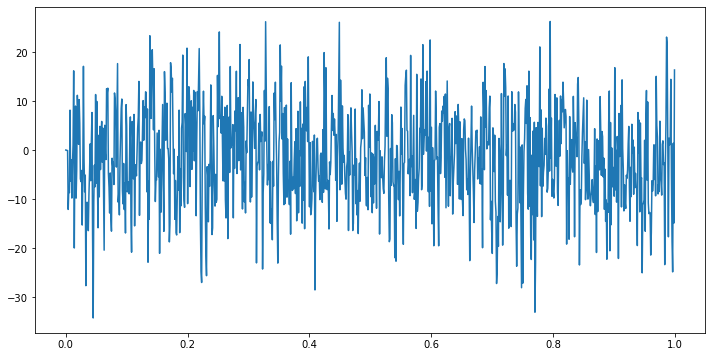

In [7]:
yt_hat = rnn.predict(x,Wfx,Wxx,Wxa)
plt.figure(figsize=(12,6))
plt.plot(x,yt_hat)
#plt.plot(x[int(len(x)/2):],yt_hat)

In [ ]:
files='names.txt'
with open(files) as f:
    file = f.readlines();#extracting lines
#f = file;
#file = f.split();#space separator
text = [name.lower().strip() for name in file];
text
files=text;
files

In [ ]:
exec(open('text.py').read())
tg = Text_Generator()
seq_length = 5;
lr = 10**(-9);#learning rate
names = tg.text_decoder(files,4,seq_length,100000,lr)

In [ ]:
#One Hot Matrix Encoder
def vector_encode(basis,ch_to_idx,word):
    e = [0]*len(basis);
    for i in ch_to_idx:
        for j in range(len(list(word))):
            if(ch_to_idx[i]==word[j]):
                vec_encd[i] = 1;#vector encode 
    return e

def matrix_encode(basis,ch_to_idx,text):#One-Hot Encoder
    mat = [];
    for i in range(len(text)):
        word = text[i];
        vec = vector_encode(basis,ch_to_idx,word);
        mat.append(vec);
    return np.array(mat);
ch_to_idx['a']
word = text[0][0];
word
#X = matrix_encode(basis,ch_to_idx,text)

In [ ]:
text = files.lower();
basis = list(set(text));#unique words/vocab-size
ch_to_idx = {ch:idx for idx,ch in enumerate(sorted(basis))}#dictionary from character to index map y->C-1(y)
idx_to_ch = {idx:ch for idx,ch in enumerate(sorted(basis))}#dictionary from index to character map y->f(x)
#with open(files) as f:
#    file = f.readlines();#extracting lines
f = files;
file = f.split();#space separator
text = [name.lower().strip() for name in file];
np.random.shuffle(text);#randomization
#X = [None]+[ch_to_idx[ch] for ch in text[index]]
#Y = X[1:]+[ch_to_idx['\n']]
X = matrix_encode(idx_to_ch,text)
text_y = [name+'\n' for name in text];
Y = matrix_encode(idx_to_ch,text_y);

In [ ]:
exec(open('rnn.py').read())
rnn = RNN()
X,Y = rnn.text_encoder(files)
hid_neurons = 100;
seq_length = X.shape[1];
epochs = 100;
lr = 10**(-9);
Wfx,Wxx,Wxa,J = rnn.fit(X,Y,hid_neurons,seq_length,epochs,lr);

In [ ]:
x = np.random.randn([4,X.shape[1]])
yt_hat = rnn.predict(x,Wfx,Wxx,Wxa)

In [ ]:
plt.plot(yt_hat)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')

In [ ]:
epoch=10001
input_dim = len(basis);
index = epoch%len(text);
index
X = [None]+[ch_to_idx[ch] for ch in text[index]]
Y = X[1:]+[ch_to_idx['\n']]

In [ ]:
l =text[0];
l[3]

In [ ]:
rnn = RNN()
hid_neurons = 100; seq_length = 5; epochs=2; lr=10**(-5);
Wfx,Wxx,Wxa,J = rnn.fit(X,Y,hid_neurons,seq_length,epochs,lr)

In [ ]:
print('Wxx = ',Wxx)